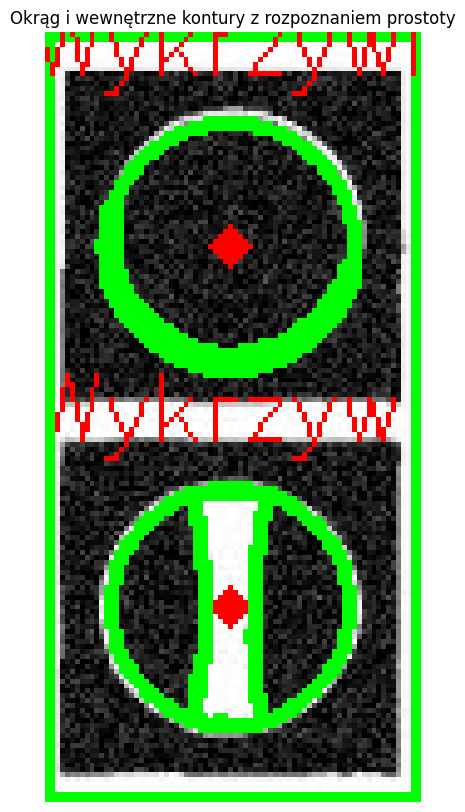

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_straight(contour, threshold=0.05):
    """Funkcja do sprawdzania, czy kontur jest prosty czy wykrzywiony."""
    arc_length = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    if area == 0:
        return False
    circularity = 4 * np.pi * (area / (arc_length * arc_length))
    return circularity > (1 - threshold)

# 1. Wczytanie obrazu
image_path = 'scheme009.jpg'
image = cv2.imread(image_path)

# Sprawdzenie, czy obraz został poprawnie wczytany
if image is None:
    raise FileNotFoundError(f"Obraz nie został znaleziony w ścieżce: {image_path}")

# Konwersja do skali szarości
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Filtracja wstępna
filtered = cv2.medianBlur(gray, 5)

# Wykrycie okręgów za pomocą transformacji Hougha
circles = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Rysowanie okręgu
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Rysowanie środka okręgu
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)
        
        # Maskowanie obszaru wewnątrz okręgu
        mask = np.zeros_like(gray)
        cv2.circle(mask, (i[0], i[1]), i[2], 255, thickness=-1)
        
        # Znalezienie konturów wewnątrz maski
        masked_image = cv2.bitwise_and(gray, gray, mask=mask)
        _, binary = cv2.threshold(masked_image, 127, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Rysowanie wewnętrznych konturów i rozpoznawanie prostoty
        for contour in contours:
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
            if is_straight(contour):
                cv2.putText(image, "Prosty", (i[0] - 40, i[1] - i[2] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)
            else:
                cv2.putText(image, "Wykrzywiony", (i[0] - 40, i[1] - i[2] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)

# Wyświetlenie końcowego obrazu
plt.figure(figsize=(10, 10))
plt.title('Okrąg i wewnętrzne kontury z rozpoznaniem prostoty')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
